# 两样本位置问题

## Brown-Mood中位数检验

考虑两个总体$A$,$B$，假如它们分布完全一样，则分别出自规模为$m$，$n$的样本合起来就是同分布的$m + n$规模样本。
这时候以那个分布的中位数参数去划分每个观测，分为小于中位数参数$M$的小于集$L$与大于集$H$，其中$L$的元素个数是一随机变量，
$L$中属于$A$和$B$的元素个数也是随机变量。问$L$中出自$A$的元素个数这一随机变量所服从的分布？

$L$中出自$A$的个数等于单独看$A$其样本小于$M$的个数。显然这服从$Binom(m,0.5)$。

如果给出条件，$L$元素个数为给定值呢？(下面直接令$A$,$B$表示$A$,$B$集中小于$M$的数量，用$L$表示$L$集元素个数。)

$$
P(A = k | L = s) = \frac{P(A = k \cap L = s)}{P(L = s)} = \frac{P(A = k \cap B = s - k)}{P(L = s)} 
= \frac{ \frac{1}{2^s}C_m^k C_n^{s-k} }{ \sum_{i=0}^s \frac{1}{2^s} C_m^i C_n^{s-i} }
= \frac{ C_m^k C_n^{s-k} }{ \sum_{i=0}^s  C_m^i C_n^{s-i} } = \frac{ C_m^k C_n^{s-k} }{ C_{m+n}^s }
$$

结果是超几何分布。上式中若有无定义的组合数出现，均设其值为0.最后一步和式的合并是纯组合的，不幸的是，
似乎很难向超几何分布的那种m,n合成总体里抽s个中有k个m总体的模型进行规约。这看起来本身就是一个基础性的命题——
即两个$p=0.5$二项分布随机变量在给出和等于某个数的条件后，单个的条件分布从无条件的二项分布变为超几何分布。和泊松过程那个给出某个时间段
发生事件数，那些事件的发生变成均匀分布有着类似的怪异。

注意上式中若使用其他$q$分位数($q \neq 0.5$)，则还可以继续使用超几何分布。多总体时则可能需要多变量超几何分布。

既然总体分布相同，中位数相同命题等价于其他任意分位数相同，所以我们其实可以随便在哪个潜在可以作为$q$分位数的点上检验，
这时我们的检验统计量是小于给定数$Q$的A的个数，原假设是$Q$对应的$q$分位点相同（尽管我们其实不知道$q$等于多少）。
一旦拒绝$Q$对应的$q$分位数相同，我们也可直接得到中位数不相同的结论。

然而这是将Brown-Mood中位数检验用到了也可以用Wilcoxon秩和（不是Wilcoxon符号秩signrank）检验的场合，即两总体完全一样或只有位置不一样，
但Brown-Mood检验和符号检验之所以还有用，是因为它们比Wilcoxon符号秩的对称（才能搞出绝对差同分布双总体利用更多信息）和Wilcoxon秩和
的只可能有位置差异同分布更弱的假设。比如容易看出上述论述大部分只要稍作变化，就对只要求某个分位数相同的假设成立。但致命的是如果我们选择的
检验统计量是样本中位数，实际我们拒绝的q分位数假设并不能得出拒绝中位数相同的假设（虽然也许随样本规模增大，
可以通过样本中位数趋近中位数参数得出渐进结论）

In [2]:
salary1 <- c(6864, 7304, 7477, 7779, 7895, 8348, 8461,9553, 9919, 10073, 10270,
             11581, 13472, 13600, 13962, 15019, 17244)
salary2 <- c(10276, 10533, 10633, 10837, 11209, 11393, 11864, 12040, 12642,
             12675, 13199, 13683, 14049, 14061, 16079)

cat(median(salary1),median(salary2))

9919 12040

In [19]:
M <- median(c(salary1,salary2))
M

[1] 11301

In [23]:
A21 <- sum(salary1 < M)
A22 <- sum(salary2 < M)
t <- A21 + A22
phyper(A21, length(salary1), length(salary2), A21 + A22, lower.tail=FALSE)

[1] 0.01597619

In [27]:
A11 <- sum(salary1 > M)
A12 <- sum(salary2 > M)
t <- A11 + A12
phyper(A11, length(salary1), length(salary2), A11 + A12)

[1] 0.07780674

In [28]:
phyper(A11-1, length(salary1), length(salary2), A11 + A12)

[1] 0.01597619

看得出小样本的p值有多么不稳健，+-1误差就是定性的差别。

### 置信区间问题

我们继续从假设检验中把区间反推出来，不过此处我们加强假设为wilcoxon秩和检验要求的程度。
即检验的两总体只有位置差异，可以形式的表达为：

$X$与$Y+\theta$有相同的分布。

如此，$X-Y = \theta$中，将$\theta$各种取值，就可以造出不同的假设以及检验统计量（以及实现值），这时可以从两个方向构造同分布。
譬如说$\theta > 0 $，这就是说$X$总体比$Y$大。于是我们可以把列联表中划分上下格标准差异化（原本是一样的），
$X$用原来那个，$Y$的标准则降低$\theta$，于是恢复了之前的同分布性，其左上角统计量值也没变，
但是右边的和条件变了，也就是说统计量分布变了。于是我们获得不同的p值，容易看出随着$\theta$越来越大，p值终将趋于0.反之亦然，
于是我们可以定出p值临界点（$\alpha/2$），将走到临界点附近的$\theta$值作为置信区间的边缘。

另一个思路是加高左边的$\theta$要求来使得同分布重新成立，此时统计量值和条件和都变了，也就是统计量值与统计量分布同时变，
还不如前面那个清晰。



In [13]:
# first, get cut number, then compute the theta
M <- median(c(salary1,salary2))
MX <- median(salary1)
m <- length(salary1)
n <- length(salary2)
for(left in salary2){
    A11 <- sum(salary1 > MX)
    A12 <- sum(salary2 > left)
    t <- A11 + A12
    p <- phyper(A11, m, n, A11 + A12)
    if(p>0.025){
        break
    }
}
for(right in salary2){
    A11 <- sum(salary1 > MX)
    A12 <- sum(salary2 > right)
    t <- A11 + A12
    p <- phyper(A11, m, n, A11 + A12)
    if(p>0.975){
        break
    }
}


In [14]:
list(left-MX,right-MX)

[[1]]
[1] 714

[[2]]
[1] 3764

In [13]:
left

[1] 10633

In [14]:
right

[1] 13683

注意这里估计的不是$\theta$，我们实际试了一些容许的$M_Y$的值。假设写为$M_X - M_Y = \theta$。
则这里计算的(left,right)实际是$M_Y - M_X = -\theta$，所以正的区间意味着负的$\theta$区间，也就是说$Y$或第二个样本比$X$大，
位置比其靠右。$M_X$换回合并中位数$M$理论上说也区别不大，因为我们只需要分配是公平的即可，
是不是以某个中位数为基础没什么区别（事实上也不知道真实中位数），当然可以直观看出靠近中位数的检验比较有效，相比起在另外两个极端。

仔细考虑一下，好像也没有必要要求两总体间只有位置差异，只设定$M_X - M_Y = \theta$就够了。仍然是Wilcoxon秩和来反转才需要。

## Wilcoxon(Mann-Whitney)秩和检验

wilcoxon秩和检验大体思路Chapter 2的笔记中已经写了。就是在单样本中因为丢弃信息表现相对较差那个检验。

In [47]:
rs <- rank(c(salary1,salary2))
WX <- sum(rs[1:length(salary1)])
WY <- sum(rs[(length(salary1)+1):(length(salary1)+length(salary2))])
WX
WY

[1] 222

[1] 306

In [49]:
WXY <- sum(outer(salary2,salary1,'-')>0)
WXY

[1] 186

In [50]:
WYX <- sum(outer(salary1,salary2,'-')>0)
WYX

[1] 69

In [51]:
WXY + 0.5*length(salary2)*(length(salary2)+1)

[1] 306

In [52]:
WYX + 0.5*length(salary1)*(length(salary1)+1)

[1] 222

In [54]:
pwilcox(WYX,length(salary1),length(salary2))

[1] 0.01352166

In [55]:
wilcox.test(salary1,salary2,'less')


	Wilcoxon rank sum test

data:  salary1 and salary2
W = 69, p-value = 0.01352
alternative hypothesis: true location shift is less than 0


## $M_X - M_Y$的点估计和区间估计



类似Brown-Mood检验反推区间的方式，这里我们一开始假设就已经是两样本间只有位置差异了，所以对于假设

$$
M_X - M_Y = \theta
$$

就可以推出

$$
F_X(x) - F_Y(x) = \theta
$$

我们可以尝试不同的$\theta$值，在$Y$样本上加上这个数或在$X$样本上减去这个数，就可以得到在这个假设下来自两个同分布总体的样本。
然后再跑wilcoxon秩和检验，收集不显著的点。

那么我们就需要找到那些经过时使得$W_{XY}$统计量突变的点。
容易想到把$X,Y$的笛卡尔积求差排序后从左往右设定$-\theta$值可以使得$W_{XY}$从$mn$取到$0$。


In [5]:
ser <- sort(outer(salary2,salary1,'-'))
ser

[1] -6968 -6711 -6611 -6407 -6035 -5851 -5380 -5204 -4743 -4602 -4569 -4486
 [13] -4386 -4182 -4045 -3810 -3686 -3626 -3561 -3429 -3329 -3324 -3196 -3195
 [25] -3183 -3155 -3125 -3067 -2979 -2967 -2939 -2839 -2763 -2753 -2635 -2569
 [37] -2391 -2377 -2344 -2263 -2207 -2098 -2079 -1922 -1820 -1736 -1608 -1560
 [49] -1432 -1336 -1320 -1305 -1287 -1165 -1048  -970  -958  -958  -948  -925
 [61]  -830  -797  -763  -744  -401  -372  -279  -273  -188     6    83    87
 [73]    99   203   211   263   283   357   363   449   459   460   461   560
 [85]   567   577   589   614   714   723   764   918   939   980  1060  1061
 [97]  1080  1094  1123  1136  1284  1290  1320  1474  1594  1618  1656  1770
[109]  1791  1815  1840  1928  1945  1967  2072  2102  2117  2121  2172  2185
[121]  2285  2311  2372  2376  2381  2405  2468  2479  2480  2487  2489  2497
[133]  2569  2602  2607  2638  2723  2738  2748  2754  2756  2799  2854  2861
[145]  2929  2932  2942  2972  3045  3056  3058  3089  3122  3126  3156  3229
[157]  3280  3314  3329  3360  3403  3412  3413  3430  3498  3516  3533  3579
[169]  3610  3614  3646  3669  3692  3732  3764  3769  3779  3791  3905  3916
[181]  3969  3973  3976  3988  4085  4089  4130  4130  4142  4145  4181  4214
[193]  4261  4294  4327  4345  4387  4496  4498  4508  4529  4560  4563  4736
[205]  4738  4747  4780  4851  4863  4896  5000  5165  5176  5198  5222  5304
[217]  5335  5338  5371  5420  5588  5600  5701  5713  5722  5778  5788  5809
[229]  5811  5895  5904  6006  6154  6160  6166  6206  6270  6282  6335  6379
[241]  6526  6572  6584  6745  6757  6819  7185  7197  7618  7731  8184  8300
[253]  8602  8775  9215

In [7]:
qwilcox(0.025,length(salary1),length(salary2))

[1] 76

In [8]:
qwilcox(0.975,length(salary1),length(salary2))

[1] 179

In [9]:
length(ser)

[1] 255

In [12]:
list(ser[76],ser[179])

[[1]]
[1] 263

[[2]]
[1] 3905

上面其实设定的是$-\theta$值，故其实是$Y$比$X$大的参数的置信区间。$X - Y = \theta,Y - X = -\theta$

所以...wilcoxon的置信区间比Brown-Mood的还大？当然两者p值差不了多少，而且前者因为+-1误差更敏感低估也容易发生这种情况。

点估计就是直接取中位数了，这里的点估计是从使得假设检验最不容易被拒绝的角度来构造的。

In [16]:
median(ser)

[1] 2479

## 正态记分检验

按单样本情况类似的思想，我们均匀采样于区间$[0,1]$，然后经逆标准正态分布函数得到正态分布上的采样点。

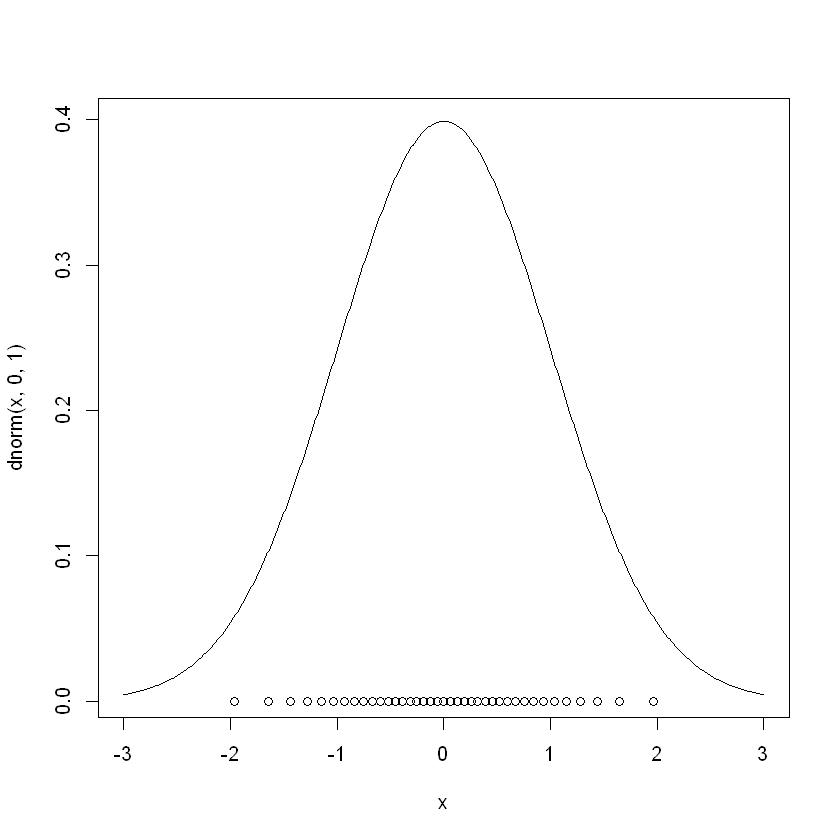

In [17]:
x <- seq(-3,3,0.01)
q2 <- seq(0,1,0.025)
x2 <- qnorm(q2,0,1)
plot(x,dnorm(x,0,1),type="l")
points(x2,rep(0,length(x2)))

然后我们将这些采样点按秩进行对应。秩最小的对应最小的采样点之类的。所以在原假设下采样点的一种特定分配之间是等概率的。不联合的看，
每个点是分配到样本$X$还是$Y$的边际分布是伯努利的，p由$m,n$的比例情况决定。

这样，我们就搞出了类似之前正态记分赋予随机+-1的随机性。不过这与恒等记分的$W_X$与阈值记分的$A_{11}$除了记分方式外有什么本质区别吗？
它近似正态分布更快吗？（其他那几个显然也是渐进正态分布）。也许吧。


In [23]:
salary <- c(salary1,salary2)
w <- qnorm(rank(salary)/(m+n+1))
w1 <- w[1:length(salary1)]
w1

[1] -1.8763586 -1.5497059 -1.3351777 -1.1689488 -1.0299568 -0.9084579
 [7] -0.7990828 -0.6985257 -0.6045853 -0.5157048 -0.4307273  0.1141853
[13]  0.6045853  0.6985257  0.9084579  1.3351777  1.8763586

In [27]:
T <- sum(w1)
S2 <- (m*n*sum(w^2))/((m+n-1)*(m+n))
S <- sqrt(S)
list(T,S)

[[1]]
[1] -5.379941

[[2]]
[1] 1.612365

In [28]:
Z <- T/S
Z

[1] -3.336677

In [26]:
pnorm(Z)

[1] 0.01925286

## 成对数据问题

容易看出，成对数据取差之后，就转化回了单样本问题。